# Testing Order of Growth

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/timing.ipynb)

Analysis of algorithms makes it possible to predict how run time will grow as the size of a problem increases.
But this kind of analysis ignores leading coefficients and non-leading terms.
So the behavior for small and medium problems might not be what the analysis predicts.

To see how run time really behaves for a range of problem sizes, we can run the algorithm and measure.

To do the measurement, we'll use the [times](https://docs.python.org/3/library/os.html#os.times) function from the `os` module.

In [2]:
import os

def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

In [3]:
start = etime()
t = [x**2 for x in range(10000)]
end = etime()
end - start

0.010000000000000231

Exercise: Use `etime` to measure the computation time used by `sleep`.

In [4]:
from time import sleep

sleep(1)

In [5]:
def time_func(func, n):
    """Run a function and return the elapsed time.

    func: function
    n: problem size, passed as an argument to func

    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

One of the things that makes timing tricky is that many operations are too fast to measure accurately.

`%timeit` handles this by running enough times get a precise estimate, even for things that run very fast.

We'll handle it by running over a wide range of problem sizes, hoping to find sizes that run long enough to measure, but not more than a few seconds.


The following function takes a size, `n`, creates an empty list, and calls `list.append` `n` times.

In [1]:
def list_append(n):
    t = []
    [t.append(x) for x in range(n)]

`timeit` can time this function accurately.

In [6]:
%timeit list_append(10000)

1.48 ms ± 413 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


But our `time_func` is not that smart.

In [7]:
time_func(list_append, 10000)

0.0

Exercise: Increase the number of iterations until the run time is measureable.

In [41]:
time_func(list_append, 99999)

0.00999999999999801

## List append

The following function gradually increases `n` and records the total time.

In [8]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.

    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

In [9]:
ns, ts = run_timing_test(list_append)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.009999999999999787
65536 0.0
131072 0.02000000000000135
262144 0.02999999999999936
524288 0.0600000000000005
1048576 0.1399999999999988
2097152 0.27999999999999936
4194304 0.5600000000000005
8388608 1.0600000000000005


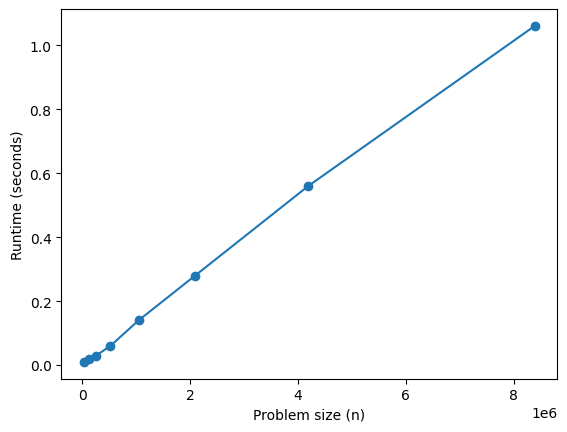

In [10]:
import matplotlib.pyplot as plt

plt.plot(ns, ts, 'o-')
plt.xlabel('Problem size (n)')
plt.ylabel('Runtime (seconds)');

This one looks pretty linear, but it won't always be so clear.
It will help to plot a straight line that goes through the last data point.

In [11]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through

    returns: sequence of fitted times


    """
    # Use the element with the given index as a reference point,
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

In [12]:
ts_fit = fit(ns, ts)
ts_fit

[0.004140625000000002,
 0.016562500000000008,
 0.033125000000000016,
 0.06625000000000003,
 0.13250000000000006,
 0.2650000000000001,
 0.5300000000000002,
 1.0600000000000005]

The following function plots the actual results and the fitted line.

In [13]:
def plot_timing_test(ns, ts, label='', color='C0', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    scale: string passed to xscale and yscale
    """
    ts_fit = fit(ns, ts, exp)
    fit_label = 'exp = %d' % exp
    plt.plot(ns, ts_fit, label=fit_label, color='0.7', linestyle='dashed')
    plt.plot(ns, ts, 'o-', label=label, color=color, alpha=0.7)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

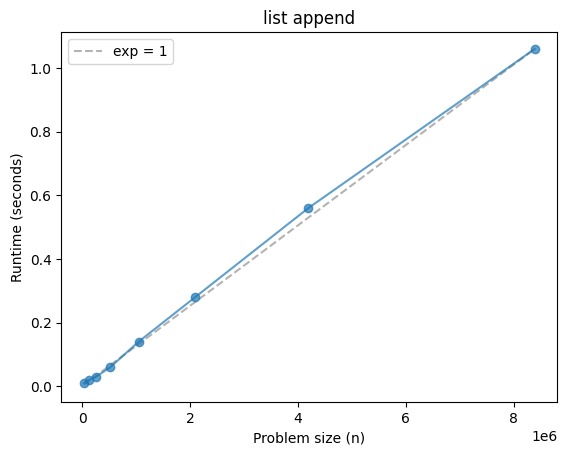

In [14]:
plot_timing_test(ns, ts, scale='linear')
plt.title('list append');

From these results, what can we conclude about the order of growth of `list.append`? **O(n), Linear**


Before we go on, let's also look at the results on a log-log scale.

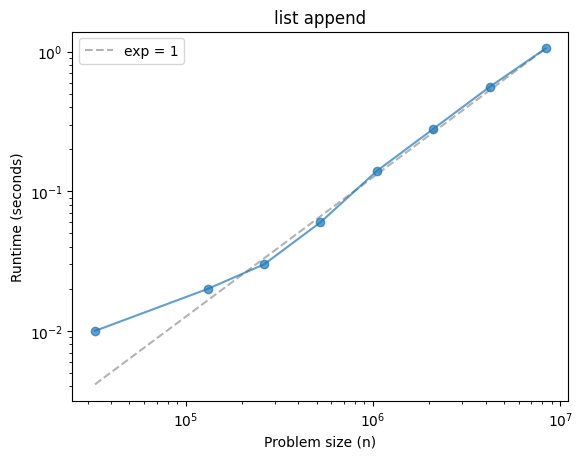

In [15]:
plot_timing_test(ns, ts, scale='log')
plt.title('list append');

Why might we prefer this scale? **Because with log scale makes it easier to interpret larger number deviations for extremely small numbers in a line**


## List pop

Now let's do the same for `list.pop` (which pops from the end of the list by default).

Notice that we have to make the list before we pop things from it, so we will have to think about how to interpret the results.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.009999999999999787
131072 0.02999999999999936
262144 0.05000000000000071
524288 0.120000000000001
1048576 0.21999999999999886
2097152 0.46000000000000085
4194304 0.9099999999999984
8388608 1.5899999999999999


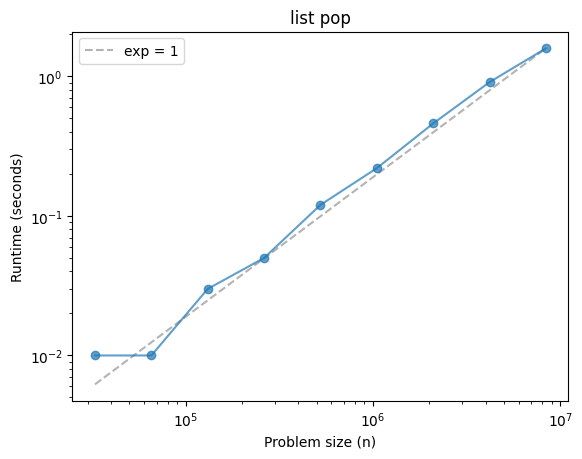

In [16]:
def list_pop(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop() for _ in range(n)]

ns, ts = run_timing_test(list_pop)
plot_timing_test(ns, ts, scale='log')
plt.title('list pop');



```
# This is formatted as code
```

What can we conclude? We can conclude that pop is constant time O(1) and multiple pops are O(n)

What about `pop(0)`, which pops from the beginning of the list? **We can conclude that a singular pop(0) is O(n) since it has to pop the first element aka remove it and shift the entire list down by that element** making it $O(n^2)$ used in the code bellow

Note: You might have to adjust `exp` to make the fitted line fit.

1024 0.0
2048 0.010000000000001563
4096 0.00999999999999801
8192 0.0
16384 0.030000000000001137
32768 0.10000000000000142
65536 0.379999999999999
131072 1.620000000000001


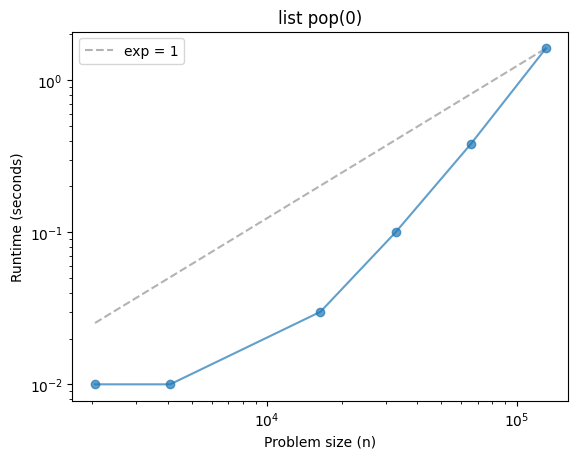

In [17]:
def list_pop0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop(0) for _ in range(n)]

ns, ts = run_timing_test(list_pop0)
plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list pop(0)');

## Searching a list

`list.index` searches a list and returns the index of the first element that matches the target.

What do we expect if we always search for the first element? ** This has complexity O(n) because searching for the element will be O(1) since python scans lists from left to right it will stop at the first element

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000001563
32768 0.0
65536 0.00999999999999801
131072 0.010000000000001563
262144 0.0400000000000027
524288 0.05999999999999872
1048576 0.14999999999999858
2097152 0.3000000000000007
4194304 0.5899999999999999
8388608 1.2100000000000009


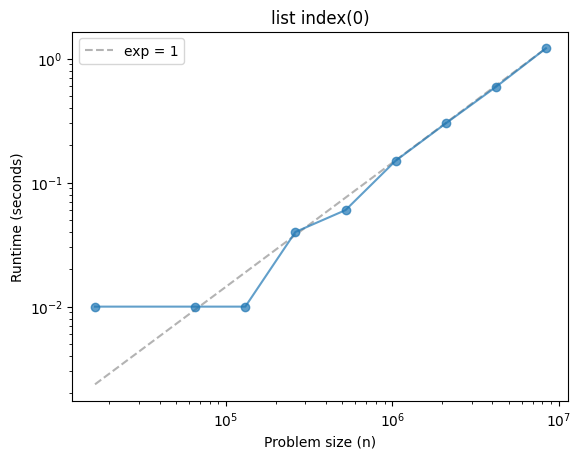

In [18]:
def list_index0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(0) for _ in range(n)]

ns, ts = run_timing_test(list_index0)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(0)');

What if we always search for the last element? **This has complexity O(n^2) because searching for the element will be O(n) since python scans lists from left to right it will stop at the first last**

1024 0.019999999999999574
2048 0.05999999999999872
4096 0.26000000000000156
8192 1.0800000000000018


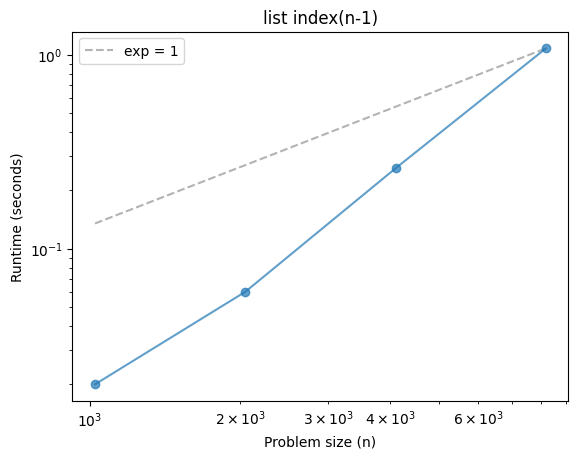

In [19]:
def list_index_n(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(n-1) for _ in range(n)]

ns, ts = run_timing_test(list_index_n)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(n-1)');

## Dictionary add

1024 0.0
2048 0.0
4096 0.0
8192 0.010000000000001563
16384 0.0
32768 0.0
65536 0.019999999999999574
131072 0.019999999999999574
262144 0.05000000000000071
524288 0.10999999999999588
1048576 0.23000000000000043
2097152 0.5199999999999996
4194304 1.0800000000000018


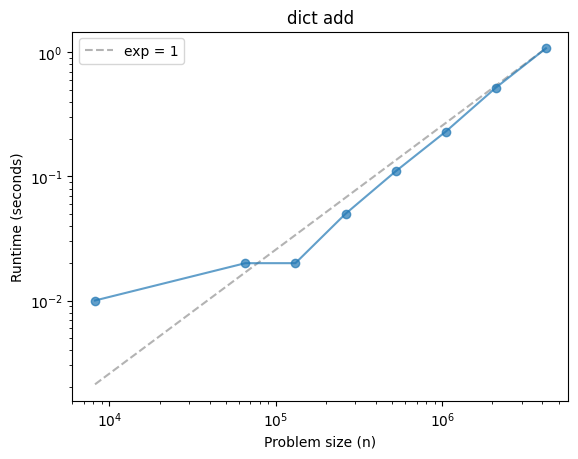

In [20]:
def dict_add(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]

ns, ts = run_timing_test(dict_add)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict add');

## Dictionary lookup

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000001563
32768 0.00999999999999801
65536 0.010000000000001563
131072 0.030000000000001137
262144 0.03999999999999915
524288 0.08999999999999986
1048576 0.23000000000000043
2097152 0.46000000000000085
4194304 1.0199999999999996


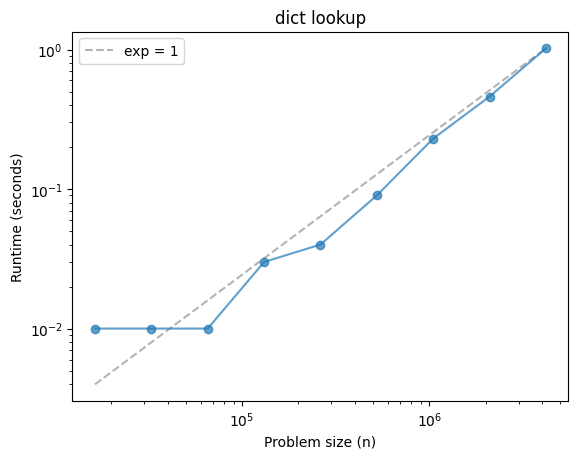

In [21]:
def dict_lookup(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]
    [d[x] for x in range(n)]

ns, ts = run_timing_test(dict_lookup)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict lookup');

This characteristic of dictionaries is the foundation of a lot of efficient algorithms!

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)